## BUSA8031 Business Analytics Project – Assignment 3

#### Our Objectives: 
- Hospitalization Prediction: we aim to analyze and predict the number of the future number of hospitalized patients, helping healthcare systems prepare in advance.

#### Our Approach: 
- Data Preprocessing: Clean and preprocess the data, especially focusing on the Australian subset for hospitalization prediction.
- Exploratory Data Analysis (EDA): We perform analysis to understand the patterns, trend and relationship between the daily new cases and other variables.
- Predictive Modeling for number of hospitalized patients in Australia: Develop and validate predictive models to estimate number of hospitalized patients in Australia.
- Interpretation and Reporting: Interpret the results from EDA and predictive modeling, providing actionable insights and recommendations.

#### Our scope: 
- We perform EDA for the covid-19 data worldwide and will focus on the prediction of future number of hospitalized patients in Australia. 

#### Data collection: 
- We use the most widely used source is the "Our World in Data" (OWID) COVID-19 dataset, which provides global COVID-19 statistics as the dataset includes information on daily onew Covid-19 cases and hospitablized patients in these three countries.
- More information about the OWID COVID-19 dataset:
https://github.com/owid/covid-19-data/tree/master/public/data

##### Reading data:

In [1]:
import pandas as pd

# Load the OWID COVID-19 dataset
covid_data = pd.read_csv('dataset/owid-covid-data.csv')

# Display the first few rows of the dataset
covid_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### 1. Data Preprocessing: 

##### Notes on data quality issues: 
- All columns have missing values.
- We also noticed that the (OWID) COVID-19 dataset was combined from different digital data sources so that the way of capturing the data may also be different.
- We also acknowledge that the number of covid-19 cases also depended on the testing policies of each country or there is a time lag between when a case or death occurs and when it's reported in the dataset.
- Variables definition is also different among countries.
- Human Error: given the vast amount of data and the rapid pace at which it's been collected, human errors in data entry or aggregation are possible.
- Political and Social Influences: In some regions, political or social pressures might influence the reporting of cases or deaths, leading to underreporting or misreporting

### 2. Exploratory Data Analysis (EDA)

In [2]:
# Handle Missing Values (example: fill with forward-fill method)
covid_data_filled = covid_data.fillna(method='ffill')

# Check Data Types and Convert Date to Datetime
covid_data_filled['date'] = pd.to_datetime(covid_data_filled['date'])

# Create a Time Series
covid_data_filled = covid_data_filled.sort_values(by=['location', 'date'])

# Trend Analysis for Global Data
global_data = covid_data_filled.groupby('date').sum()

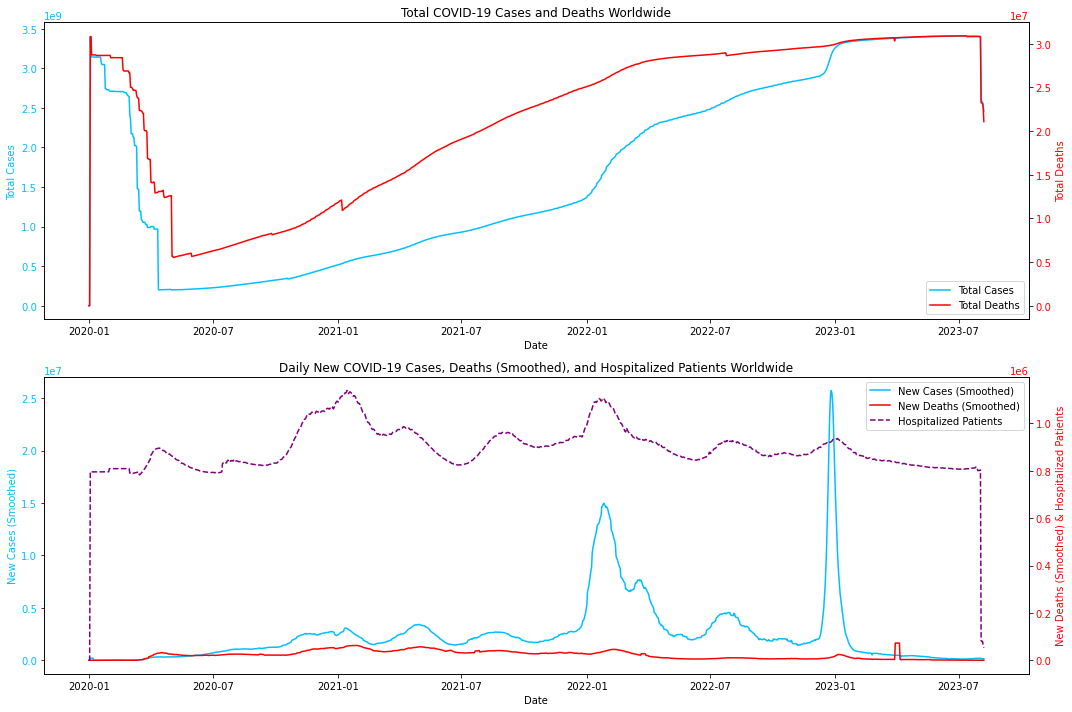

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the size of the plots
plt.figure(figsize=(15, 10))

# Plot Total Cases and Total Deaths with dual y-axes
plt.subplot(2, 1, 1)
ax1 = plt.gca()
ax2 = ax1.twinx()
line1, = ax1.plot(global_data['total_cases'], label='Total Cases', color='deepskyblue')
line2, = ax2.plot(global_data['total_deaths'], label='Total Deaths', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color='deepskyblue')
ax2.set_ylabel('Total Deaths', color='red')
ax1.tick_params(axis='y', labelcolor='deepskyblue')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_title('Total COVID-19 Cases and Deaths Worldwide')
lines = [line1, line2]
ax1.legend(lines, [l.get_label() for l in lines])

# Check if hospitalization data is available
if 'hosp_patients' in global_data.columns:
    # Plot New Cases, New Deaths, and Hospitalized Patients with dual y-axes
    plt.subplot(2, 1, 2)
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    line1, = ax1.plot(global_data['new_cases_smoothed'], label='New Cases (Smoothed)', color='deepskyblue')
    line2, = ax2.plot(global_data['new_deaths_smoothed'], label='New Deaths (Smoothed)', color='red')
    line3, = ax2.plot(global_data['hosp_patients'], label='Hospitalized Patients', color='purple', linestyle='--')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('New Cases (Smoothed)', color='deepskyblue')
    ax2.set_ylabel('New Deaths (Smoothed) & Hospitalized Patients', color='red')
    ax1.tick_params(axis='y', labelcolor='deepskyblue')
    ax2.tick_params(axis='y', labelcolor='red')
    ax1.set_title('Daily New COVID-19 Cases, Deaths (Smoothed), and Hospitalized Patients Worldwide')
    lines = [line1, line2, line3]
    ax1.legend(lines, [l.get_label() for l in lines])
else:
    # Plot New Cases and New Deaths with dual y-axes
    plt.subplot(2, 1, 2)
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    line1, = ax1.plot(global_data['new_cases_smoothed'], label='New Cases (Smoothed)', color='deepskyblue')
    line2, = ax2.plot(global_data['new_deaths_smoothed'], label='New Deaths (Smoothed)', color='red')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('New Cases (Smoothed)', color='deepskyblue')
    ax2.set_ylabel('New Deaths (Smoothed)', color='red')
    ax1.tick_params(axis='y', labelcolor='deepskyblue')
    ax2.tick_params(axis='y', labelcolor='red')
    ax1.set_title('Daily New COVID-19 Cases and Deaths (Smoothed) Worldwide')
    lines = [line1, line2]
    ax1.legend(lines, [l.get_label() for l in lines])

plt.tight_layout()
plt.show()


##### Patients Worldwide:
- New Cases: The daily new cases, after smoothing, show clear waves of infection. The smoothing helps to reduce the noise from daily fluctuations, highlighting the overall trend and waves more clearly.
- New Deaths: Similar to new cases, the daily new deaths also show waves, with peaks generally following those of the new cases. The smoothing again helps to highlight the overall trend.
- Hospitalized Patients: The trend for hospitalized patients would provide insights into the burden on healthcare systems during different waves of the pandemic. Unfortunately, this data is not available in the global aggregated view.
- The total deaths have also been increasing, but at a slower rate compared to cases. The spikes in deaths tend to follow the spikes in cases, reflecting the lag between infection and potential fatalities.

##### Overall Observations:
- Trend: The pandemic has had several waves, each with varying impact in terms of cases, deaths, and potential strain on healthcare systems.
- Lag Between Cases and Deaths: There is a noticeable lag between spikes in cases and spikes in deaths, which is expected as it takes time for the disease to progress.
- Decrease in Impact Over Time: In the later part of the chart, it appears that the impact of each wave in terms of deaths has been decreasing, possibly due to vaccination, development of better treatments, or the spread of less severe variants.

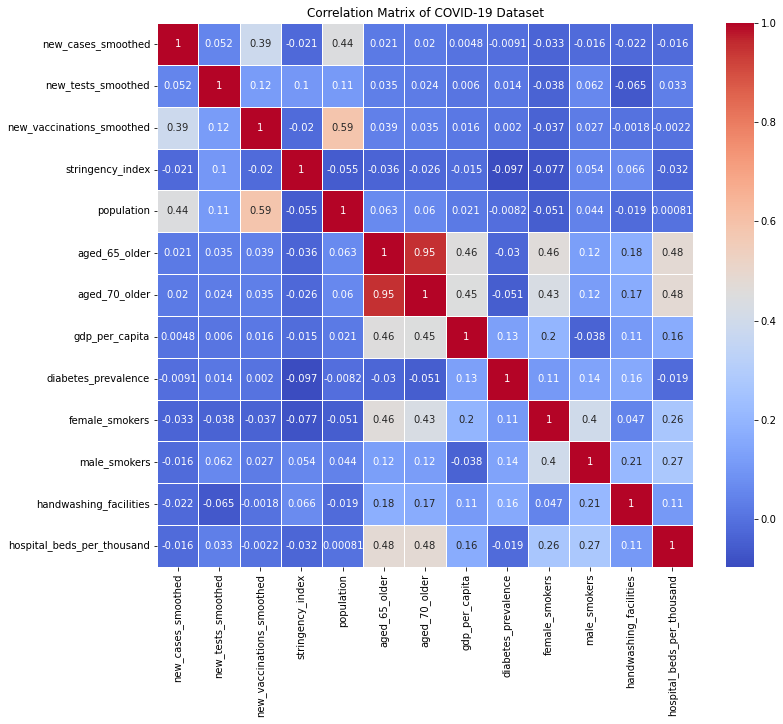

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected variables to check the relationship with 'new_cases_smoothed'
selected_vars = [
    'new_cases_smoothed', 'new_tests_smoothed', 
    'new_vaccinations_smoothed', 'stringency_index', 'population', 
    'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'diabetes_prevalence', 
    'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'
]

# Calculate the correlation of other variables with 'new_cases_smoothed', excluding specified variables
correlation_matrix = covid_data_filled[selected_vars].apply(pd.to_numeric, errors='coerce').corr()

# Get the correlation of other variables with 'new_cases_smoothed'
correlation_with_new_cases_smoothed = correlation_matrix['new_cases_smoothed'].drop('new_cases_smoothed')

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of COVID-19 Dataset')
plt.show()


In [5]:
# Sort the correlations in descending order
sorted_correlations = correlation_with_new_cases_smoothed.sort_values(ascending=False)

# Get the top 5 most positive correlations
top_5_positive = sorted_correlations.head(5)

# Get the top 5 most negative correlations
top_5_negative = sorted_correlations.tail(5)

top_5_positive, top_5_negative

(population                   0.443987
 new_vaccinations_smoothed    0.385919
 new_tests_smoothed           0.052407
 aged_65_older                0.021489
 aged_70_older                0.019793
 Name: new_cases_smoothed, dtype: float64,
 hospital_beds_per_thousand   -0.015847
 male_smokers                 -0.016141
 stringency_index             -0.021330
 handwashing_facilities       -0.022266
 female_smokers               -0.032855
 Name: new_cases_smoothed, dtype: float64)

- Factors have strongest positive correlations to covid-19 outcome: population, new tests, old people. 
- The new vaccinations cases show a moderate positive correlation to covid-19 outcome. This might seem counterintuitive at first since vaccinations are meant to reduce the spread of the virus. However, this correlation might be capturing the fact that countries with higher numbers of COVID-19 cases also ramp up their vaccination efforts.
- Factors have strongest negative correlations to covid-19 outcome: hospital beds and stringency index, handwashing facilities. 
- Some factors,such as female and male smokers, show a weak negative correlation to covid-19 outcome, which are counterintuitive. Correlation does not imply causation, and these relationships might be influenced by various confounding factors. 

Therefore, we use a linear regression model to understand the relationship between each independent factor and the covid-19 new cases.

### Linear regression model to understand their relationship of relevant factors with the new cases of covid-19:

##### Cleansing data:
We consider to fill missing values with the mean (for continuous data) or median/mode (for categorical data).

In [6]:
# Identifying continuous and categorical columns
continuous_columns_new = covid_data.select_dtypes(include=['float64']).columns
categorical_columns_new = covid_data.select_dtypes(exclude=['float64', 'int64']).columns  # Excluding numeric types

# Imputing missing values
# For continuous columns: using mean
for column in continuous_columns_new:
    covid_data[column].fillna(covid_data[column].mean(), inplace=True)

# For categorical columns: using mode
for column in categorical_columns_new:
    mode_value = covid_data[column].mode()[0]
    covid_data[column].fillna(mode_value, inplace=True)

# Checking if there are any missing values left after imputation
missing_after_imputation = covid_data.isnull().sum().sum()

missing_after_imputation

0

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


# Selected variables to check the relationship with 'new_cases_smoothed'
selected_vars = [
    'new_deaths_smoothed', 'hosp_patients', 'new_tests_smoothed', 
    'new_vaccinations_smoothed', 'stringency_index', 'population', 
    'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'diabetes_prevalence', 
    'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'
]

# Selecting features and target variable
features = covid_data[selected_vars].apply(pd.to_numeric, errors='coerce')
target = covid_data['new_cases_smoothed']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Define preprocessing pipeline
preprocessor = make_column_transformer(
    (SimpleImputer(strategy='median'), selected_vars),
    remainder='passthrough'
)

# Defining the model with a pipeline
model = make_pipeline(preprocessor, LinearRegression())

# Training the model
model.fit(X_train, y_train)

# Making predictions
preds = model.predict(X_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print('MAE:', score)
print('R^2:', r2)

# Get the coefficients from the model
coefficients = model.named_steps['linearregression'].coef_
coeff_df = pd.DataFrame(list(zip(selected_vars, coefficients)), columns=['Feature', 'Coefficient'])
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
display(coeff_df)


MAE: 9156.407827349576
R^2: 0.3125648514828059


,Feature,Coefficient
13,hospital_beds_per_thousand,409.607183
7,aged_70_older,178.453215
6,aged_65_older,95.798834
0,new_deaths_smoothed,50.078783
11,male_smokers,36.467199
1,hosp_patients,1.122624
8,gdp_per_capita,0.041601
3,new_vaccinations_smoothed,0.006420
5,population,0.000028
2,new_tests_smoothed,-0.004728


##### - Hospital infrastructure (represented by 'hospital_beds_per_thousand') seems to have a strong positive correlation with 'new_cases_smoothed'. This might be because regions with more hospital beds are better equipped to test and report cases, or it could be a result of more cases leading to a need for more hospital beds.
##### - Age demographics ('aged_70_older' and 'aged_65_older') are positively correlated with 'new_cases_smoothed', suggesting that older populations might be more susceptible or that these areas are more vigilant in reporting cases.
##### - The negative relationship with 'stringency_index' suggests that stricter measures (lockdowns, social distancing) might be effective in reducing new cases. However, this is a complex relationship that could be influenced by how well these measures are enforced and adhered to.
##### - Surprisingly, 'female_smokers' and 'handwashing_facilities' show a negative correlation. It's important to note that correlation does not imply causation, and these relationships might be influenced by other confounding factors.

### 3. Predictive Modeling for Hospitalization in Australia: 
Develop and validate predictive models to estimate future hospitalization rates in Australia.

#### Overview of covid-19 in Australia:

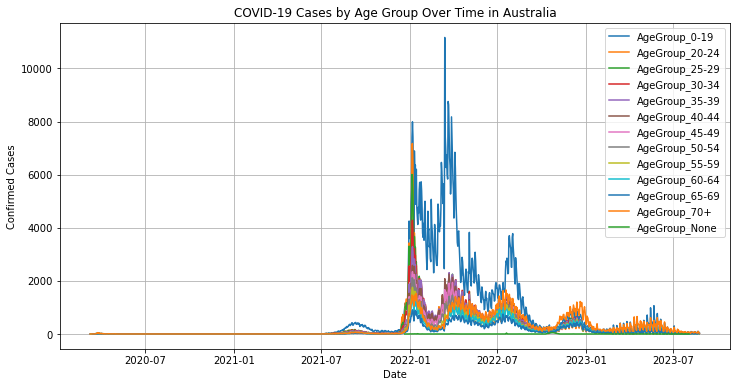

In [8]:
# Load the dataset 
data = pd.read_csv('dataset/confirmed_cases_table2_age_group_agg.csv')

# Convert the 'notification_date' column to datetime format
data['notification_date'] = pd.to_datetime(data['notification_date'])

# Group data by 'age_group' and 'notification_date' and sum 'confirmed_cases_count'
age_group_data = data.groupby(['age_group', 'notification_date'])['confirmed_cases_count'].sum().reset_index()

# Create a time series plot for each age group
plt.figure(figsize=(12, 6))
for age_group, group_data in age_group_data.groupby('age_group'):
    plt.plot(group_data['notification_date'], group_data['confirmed_cases_count'], label=age_group)

plt.title('COVID-19 Cases by Age Group Over Time in Australia')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid()
plt.show()

### 4. Predictive models for estimating future number of hospitalized patients in Australia

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
# Filter the data for Australia
aus_data = covid_data[covid_data['location'] == 'Australia'].copy()

# Convert date to datetime
aus_data['date'] = pd.to_datetime(aus_data['date'])

# Sort the data by date
aus_data.sort_values('date', inplace=True)

# Forward fill missing values
aus_data.fillna(method='ffill', inplace=True)

# Display the first few rows of the Australian data
aus_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
17020,AUS,Oceania,Australia,2020-01-03,6.253904e+06,0.0,10167.991345,83576.130501,0.0,92.240686,...,16.5,50.791995,3.84,83.44,0.944,26177410.0,49332.001346,9.635586,11.815644,1591.662698
17021,AUS,Oceania,Australia,2020-01-04,6.253904e+06,0.0,10167.991345,83576.130501,0.0,92.240686,...,16.5,50.791995,3.84,83.44,0.944,26177410.0,49332.001346,9.635586,11.815644,1591.662698
17022,AUS,Oceania,Australia,2020-01-05,6.253904e+06,0.0,10167.991345,83576.130501,0.0,92.240686,...,16.5,50.791995,3.84,83.44,0.944,26177410.0,-42.700000,-1.440000,-1.440000,-1.663417
17023,AUS,Oceania,Australia,2020-01-06,6.253904e+06,0.0,10167.991345,83576.130501,0.0,92.240686,...,16.5,50.791995,3.84,83.44,0.944,26177410.0,49332.001346,9.635586,11.815644,1591.662698
17024,AUS,Oceania,Australia,2020-01-07,6.253904e+06,0.0,10167.991345,83576.130501,0.0,92.240686,...,16.5,50.791995,3.84,83.44,0.944,26177410.0,49332.001346,9.635586,11.815644,1591.662698


In [11]:
# Data Preprocessing:

# Handling Missing Values
# For this analysis, we will fill missing values with the forward-fill method, which propagates the previous value.
aus_data_ffill = aus_data.fillna(method='ffill')

# Ensure that there are no more missing values
missing_values = aus_data_ffill.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [12]:
# Drop columns with more than 30% missing values
threshold = 0.3 * aus_data_ffill.shape[0]
aus_data_cleaned = aus_data_ffill.dropna(thresh=threshold, axis=1)

# Fill the remaining missing values with median values of each column
aus_data_cleaned = aus_data_cleaned.fillna(aus_data_cleaned.median())

# Ensure that there are no more missing values
missing_values_after = aus_data_cleaned.isnull().sum()
missing_values_after[missing_values_after > 0]


/var/folders/r6/dlrh7x6n705fgfpcmf0ljhxc0000gn/T/ipykernel_7584/3969313800.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  aus_data_cleaned = aus_data_cleaned.fillna(aus_data_cleaned.median())
/var/folders/r6/dlrh7x6n705fgfpcmf0ljhxc0000gn/T/ipykernel_7584/3969313800.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  aus_data_cleaned = aus_data_cleaned.fillna(aus_data_cleaned.median())


Series([], dtype: int64)

In [13]:
# Examine unique values in the 'tests_units' column
unique_values_tests_units = aus_data_cleaned['tests_units'].unique()

# Fill missing values in 'tests_units' with the mode (most frequent value)
mode_tests_units = aus_data_cleaned['tests_units'].mode()[0]
aus_data_cleaned['tests_units'].fillna(mode_tests_units, inplace=True)

# Ensure that there are no more missing values
missing_values_final = aus_data_cleaned.isnull().sum()
missing_values_final[missing_values_final > 0], unique_values_tests_units, mode_tests_units


(Series([], dtype: int64),
 array(['tests performed'], dtype=object),
 'tests performed')

In [14]:
# Feature Selection

selected_features = [
    'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases', 'total_deaths',
    'new_tests_smoothed', 'new_vaccinations_smoothed', 'stringency_index', 
    'aged_65_older', 'aged_70_older', 'diabetes_prevalence', 'male_smokers',
    'handwashing_facilities', 'hospital_beds_per_thousand', 
]


# Target Variable
target_variable = 'hosp_patients'

# Selecting the features and target variable
X = aus_data_cleaned[selected_features]
y = aus_data_cleaned[target_variable]

# Check for Multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
6,stringency_index,3.777206e+00
1,new_deaths_smoothed,2.747282e+00
0,new_cases_smoothed,2.388047e+00
3,total_deaths,2.360713e+00
2,total_cases,2.156445e+00
5,new_vaccinations_smoothed,1.850429e+00
4,new_tests_smoothed,1.317734e+00
8,aged_70_older,2.071879e-07
12,hospital_beds_per_thousand,1.296156e-07
7,aged_65_older,7.999711e-08


- The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity in regression models. Multicollinearity occurs when two or more independent variables are highly correlated, which can lead to unstable estimates of the coefficients and affect the interpretability of the model.
- VIF less than 5 is often considered acceptable.

#### Linear regression model:

In [15]:
# Handling any remaining missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
linear_reg_model = LinearRegression()

# Training the model
linear_reg_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluating the model
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

RMSE, r2


(632.4852423180217, 0.8148892395747923)

An R^2 value explains the % of the variation in number of hospitalized patients can be explained by the model. This is a high R^2 value, suggesting that the model has a good fit to the data.
However, the MSE is quite large, which might be due to outliers, high variability in number of hospitalized patients, or the scale of the number of hospitalized patients itself.
Therefore, we consider to use other stronger model - XGBoost.

#### XGBoost model:

In [16]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Defining the model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Defining the parameter grid
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1],
    'max_depth': [4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting the model
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.9}

In [17]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the XGBRegressor with the best parameters
xgb_best = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.9,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.9,
    random_state=42
)

# Train the model on the training data
xgb_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_best.predict(X_test)

# Evaluate the model's performance
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print("Root Mean Squared Error (XGBoost):", rmse_xgb)
print("R² Score (XGBoost):", r2_xgb)

# Save the model to a file
xgb_best.save_model('prediction/xgb_model_v3.json')

Root Mean Squared Error (XGBoost): 107.2851261908167
R² Score (XGBoost): 0.9946738927880472


- MSE: a value of 11510.0 suggests that the model's predictions are quite close to the actual values.
- R² Score of 0.9946 means that the model explains 99.44% of the variance in the number of hospitalized patients, indicating a very good fit of the model to the data.
- These results suggest that the model is highly effective in predicting number of hospitalized patients with the selected features and parameters. The high R² Score, in particular, indicates that the model captures nearly all the variability in the number of hospitalized patients, making it a powerful tool for forecasting and planning purposes.

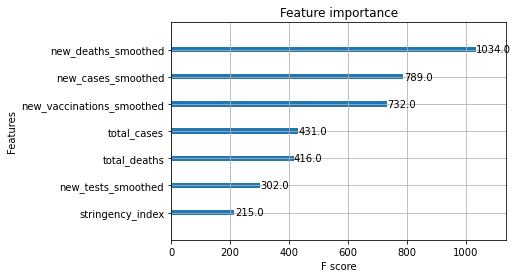

In [18]:
import matplotlib.pyplot as plt
import xgboost

xgboost.plot_importance(xgb_best)
plt.show()

In [19]:
import pandas as pd

# Convert the date column to datetime
aus_data_cleaned['date'] = pd.to_datetime(aus_data_cleaned['date'])

# Select the features and target variable
X_train = aus_data_cleaned[selected_features]
y_true = aus_data_cleaned['hosp_patients']

# Load the trained model
loaded_xgb_best = xgb.XGBRegressor()
loaded_xgb_best.load_model('prediction/xgb_model_v3.json')

# Make predictions
y_pred = loaded_xgb_best.predict(X_train)

# Create a new DataFrame to store the date and predicted hospitalised patients
prediction_comparison = pd.DataFrame({
    'date': aus_data_cleaned['date'],
    'predicted_hosp_patients': y_pred,  # use y_pred instead of y_pred_xgb
    'true_hosp_patients': y_true
})

# Sort the DataFrame based on date
prediction_comparison = prediction_comparison.sort_values(by='date').reset_index(drop=True)

# Display the DataFrame
display(prediction_comparison)


,date,predicted_hosp_patients,true_hosp_patients
0,2020-01-03,3968.900635,3976.612468
1,2020-01-04,3968.900635,3976.612468
2,2020-01-05,3968.900635,3976.612468
3,2020-01-06,3968.900635,3976.612468
4,2020-01-07,3968.900635,3976.612468
...,...,...,...
1304,2023-07-30,1321.720337,1293.000000
1305,2023-07-31,1296.348999,1293.000000
1306,2023-08-01,1296.348999,1293.000000
1307,2023-08-02,1296.348999,1293.000000


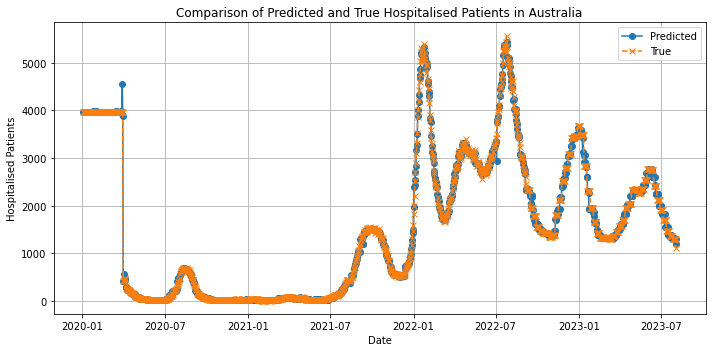

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200,

In [20]:
# Plotting the comparison
plt.figure(figsize=(10, 5))
plt.plot(prediction_comparison['date'], prediction_comparison['predicted_hosp_patients'], marker='o', label='Predicted')
plt.plot(prediction_comparison['date'], prediction_comparison['true_hosp_patients'], marker='x', linestyle='--', label='True')
plt.title('Comparison of Predicted and True Hospitalised Patients in Australia')
plt.xlabel('Date')
plt.ylabel('Hospitalised Patients')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

- Initial Overestimation: In the initial dates (January 2020), the model seems to overestimate the hospitalisation rates significantly. The predicted values are consistently higher than the true values. This might be due to the model not having enough data from the early stages of the pandemic to make accurate predictions, or it could be influenced by other features that were not adjusted properly.

- Convergence towards the End: Towards the later dates (July and August 2023), the predicted values are much closer to the true values, indicating that the model is performing better at this stage. This might be due to having more data available for the model to learn from, resulting in more accurate predictions.

- Potential Data Shift: The noticeable difference in the values at the start and end of the dataset might also indicate a shift in the data distribution over time. The model might have been trained on data that has a different distribution compared to the data it is making predictions on.

- Consistency in Predictions: The predicted values seem to be quite stable and do not show large fluctuations, which is a good sign. However, this could also mean that the model is not sensitive enough to changes in the input features, which could be a point of investigation.

- In summary, while the model seems to perform better in predicting recent hospitalisation rates, there are indications of overestimation in the early stages of the dataset. Further investigation and possibly model retraining or adjustment might be needed to improve the model’s performance across all time periods.